#####  Name: Rayudu Padma
##### **DataScience and Business Analytics intern at The Spark Foundation**
#####  Task-1: Prediction using supervisied Machine Learning
##### **Statement:Predict the percentage of an student based on the no. of study hours.**

###### Importing  required libraries 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

###### importing the dataset from remote link

In [13]:
url="http://bit.ly/w-data"
dataset=pd.read_csv(url)


In [14]:
# first five dataset values
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
# shape of the dataset
dataset.shape

(25, 2)

In [10]:
# number of columns in dataset
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [15]:
# finding whether the datset have null values or not 
dataset.isnull().any()

Hours     False
Scores    False
dtype: bool

In [16]:
# describe() function gives all mathematical values
dataset['Hours'].describe()

count    25.000000
mean      5.012000
std       2.525094
min       1.100000
25%       2.700000
50%       4.800000
75%       7.400000
max       9.200000
Name: Hours, dtype: float64

###### Visualizating relationship between data values

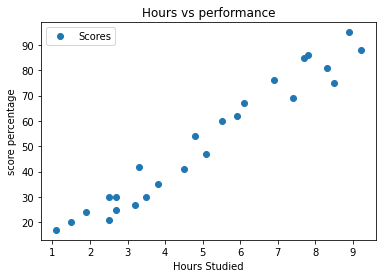

In [17]:
dataset.plot(x='Hours' ,y='Scores' ,style='o')
plt.title("Hours vs performance")
plt.xlabel("Hours Studied")
plt.ylabel("score percentage")
plt.show()

###### **Preparing the data**

The next step is to divide the data into attributes (inputs) and labels (outputs).

In [18]:
X=dataset.iloc[:, :-1].values
Y=dataset.iloc[:,1].values

######  splitting the data set 
 splitting the data as  80% of training and 20% of testing data

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

###### Training the Algorithm

In [20]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

As we know formula for linear regression is y=mx+c..here is m value

In [21]:
regressor.coef_

array([9.68207815])

Here is the 'c' intercept value

In [22]:
regressor.intercept_

2.826892353899737

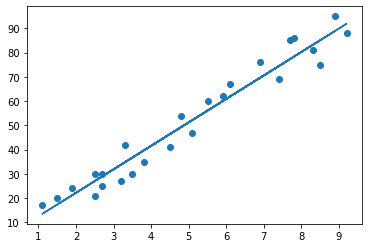

In [93]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

###### **Making Predictions**

In [23]:
print(x_test)
y_pred=regressor.predict(x_test)
print(y_pred)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]
[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


###### Actual and predicted values 

In [26]:
dp=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
print(dp)

   Actual  predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


In [28]:
# Testing our own data
prediction=regressor.predict([[9.25]])
print("total hours = ",9.25)
print("predicted score = ", prediction[0])

total hours =  9.25
predicted score =  92.38611528261494


###### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [29]:
print('Mean Square Error:', 
      mean_squared_error(y_test, y_pred)) 

Mean Square Error: 18.943211722315272


In [30]:
print("r2_error :" ,r2_score(y_pred,y_test))

r2_error : 0.9633493914970949


#### Accuracy of  the model

In [31]:
print(regressor.score(x_test,y_test))

0.9678055545167994
